## Homework

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX' -O data.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"id" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


В этой домашней работе вы будете предсказывать стоимость домов по их характеристикам.

Метрика качества: `RMSE`

Оценивание:
* Baseline - 2 балла
* Feature Engineering - 2 балла
* Model Selection - 3 балла
* Ensemble v.1 - 3 балла
* (*) Ensemble v.2 - дополнительно, 2 балла

### Описание датасета

Короткое описание данных:
```
price: sale price (this is the target variable)
id: transaction id
timestamp: date of transaction
full_sq: total area in square meters, including loggias, balconies and other non-residential areas
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
floor: for apartments, floor of the building
max_floor: number of floors in the building
material: wall material
build_year: year built
num_room: number of living rooms
kitch_sq: kitchen area
state: apartment condition
product_type: owner-occupier purchase or investment
sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population
male_f, female_f: subarea population by gender
young_*: population younger than working age
work_*: working-age population
ekder_*: retirement-age population
n_m_{all|male|female}: population between n and m years old
build_count_*: buildings in the subarea by construction type or year
x_count_500: the number of x within 500m of the property
x_part_500: the share of x within 500m of the property
_sqm_: square meters
cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
trc_: shopping malls
prom_: industrial zones
green_: green zones
metro_: subway
_avto_: distances by car
mkad_: Moscow Circle Auto Road
ttk_: Third Transport Ring
sadovoe_: Garden Ring
bulvar_ring_: Boulevard Ring
kremlin_: City center
zd_vokzaly_: Train station
oil_chemistry_: Dirty industry
ts_: Power plant
```

### Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

Matplotlib is building the font cache; this may take a moment.


In [114]:
df_raw = pd.read_csv("data.csv", parse_dates=["timestamp"])

In [70]:
df_raw

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
0,0,2014-12-26,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,36,7,2,15,33,1,12,75,10,15318960
1,1,2012-10-04,64,64.0,16.0,NaN,NaN,NaN,NaN,NaN,...,2,2,0,0,13,1,0,6,1,6080000
2,2,2014-02-05,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,...,13,6,1,8,18,0,1,52,0,17000000
3,3,2012-07-26,71,49.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,3,0,2,8,2,990000
4,4,2014-10-29,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,...,3,1,0,5,8,0,1,34,5,7900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2014-09-22,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,...,9,0,0,6,29,0,1,46,10,7200000
19996,19996,2013-12-06,38,NaN,4.0,17.0,1.0,NaN,2.0,1.0,...,2,2,0,1,12,1,0,8,0,3971520
19997,19997,2014-06-26,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,...,13,3,0,6,27,1,10,57,13,7200000
19998,19998,2014-01-21,51,30.0,8.0,17.0,1.0,2011.0,2.0,9.0,...,1,0,0,0,7,0,0,3,0,3300000


In [71]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 292 entries, id to price
dtypes: datetime64[ns](1), float64(119), int64(157), object(15)
memory usage: 44.6+ MB


In [72]:
df_raw.isna().sum()[df_raw.isna().sum() != 0]

life_sq                                  4103
floor                                     113
max_floor                                6303
material                                 6303
build_year                               8905
num_room                                 6303
kitch_sq                                 6303
state                                    8907
preschool_quota                          4279
school_quota                             4277
hospital_beds_raion                      9404
raion_build_count_with_material_info     3175
build_count_block                        3175
build_count_wood                         3175
build_count_frame                        3175
build_count_brick                        3175
build_count_monolith                     3175
build_count_panel                        3175
build_count_foam                         3175
build_count_slag                         3175
build_count_mix                          3175
raion_build_count_with_builddate_i

Заполним пропуски в числовых значениях средним, а в категориальных - самым частым признаком с помощью SimpleImputer

In [115]:
from sklearn.impute import SimpleImputer

In [116]:
df = pd.DataFrame(df_raw.drop(columns=['id', 'timestamp']), copy=True)

In [6]:
cat_columns = [
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]
num_columns = list(set(df.columns).difference(set(cat_columns)))

In [172]:

df[num_columns] = SimpleImputer(strategy="mean").fit_transform(df[num_columns])
df[cat_columns] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_columns])

In [173]:
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.00000,1.000000,1.0,OwnerOccupier,...,36.0,7.0,2.0,15.0,33.0,1.0,12.0,75.0,10.0,15318960.0
1,64.0,64.000000,16.0,12.603928,1.0,3687.417575,1.91071,6.454917,2.0,OwnerOccupier,...,2.0,2.0,0.0,0.0,13.0,1.0,0.0,6.0,1.0,6080000.0
2,83.0,44.000000,9.0,17.000000,1.0,1985.000000,3.00000,10.000000,3.0,Investment,...,13.0,6.0,1.0,8.0,18.0,0.0,1.0,52.0,0.0,17000000.0
3,71.0,49.000000,2.0,12.603928,1.0,3687.417575,1.91071,6.454917,2.0,Investment,...,0.0,0.0,0.0,1.0,3.0,0.0,2.0,8.0,2.0,990000.0
4,60.0,42.000000,9.0,9.000000,1.0,1970.000000,3.00000,6.000000,2.0,Investment,...,3.0,1.0,0.0,5.0,8.0,0.0,1.0,34.0,5.0,7900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.0,27.000000,2.0,9.000000,1.0,1978.000000,2.00000,5.000000,2.0,Investment,...,9.0,0.0,0.0,6.0,29.0,0.0,1.0,46.0,10.0,7200000.0
19996,38.0,34.032333,4.0,17.000000,1.0,3687.417575,2.00000,1.000000,1.0,OwnerOccupier,...,2.0,2.0,0.0,1.0,12.0,1.0,0.0,8.0,0.0,3971520.0
19997,35.0,14.000000,9.0,22.000000,1.0,2001.000000,1.00000,10.000000,2.0,Investment,...,13.0,3.0,0.0,6.0,27.0,1.0,10.0,57.0,13.0,7200000.0
19998,51.0,30.000000,8.0,17.000000,1.0,2011.000000,2.00000,9.000000,2.0,Investment,...,1.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,3300000.0


А что с годом?...

In [137]:
sorted(list(df_raw['build_year'].fillna(0)), reverse=True)

[20052009.0,
 2018.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2017.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.0,
 2016.

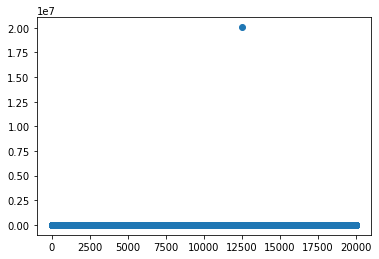

In [129]:
plt.scatter(x=np.arange(len(df_raw)), y=df_raw['build_year'])
# plt.ylim([0,20])

Ну такое надо убрать

In [87]:
df_raw[df_raw['build_year']==20052009.0]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
12486,12486,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,...,46,8,2,10,31,2,7,91,11,9000000


In [117]:
df_mod = pd.DataFrame(df_raw, copy=True)
df_mod['build_year'][12486] = 2007
print(df_raw.iloc[12486]['build_year'], df_mod.iloc[12486]['build_year'])


C:\Users\danil\AppData\Local\Temp\ipykernel_12000\2360474464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mod['build_year'][12486] = 2007


20052009.0 2007.0


(0, 2022)

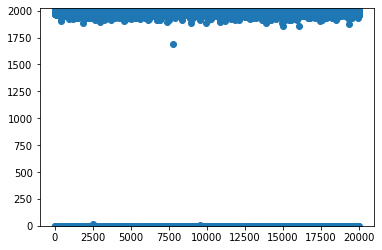

In [149]:
plt.scatter(x=np.arange(len(df_raw)), y=df_mod['build_year'])
plt.ylim([0,2022])

Ну в постройку в 1700-ых еще можно поверить, но в первый век навряд ли

In [118]:
df_mod['build_year'] = df_mod['build_year'].replace({0:np.nan, 1:np.nan})

(0, 30)

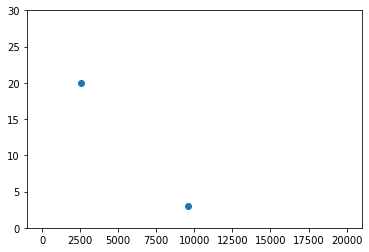

In [179]:
plt.scatter(x=np.arange(len(df_raw)), y=df_mod['build_year'])
plt.ylim([0,30])

In [159]:
sorted(list(df_mod['build_year'].fillna(2000)))

[3.0,
 20.0,
 1691.0,
 1860.0,
 1860.0,
 1876.0,
 1886.0,
 1890.0,
 1890.0,
 1890.0,
 1890.0,
 1895.0,
 1896.0,
 1896.0,
 1900.0,
 1900.0,
 1904.0,
 1905.0,
 1906.0,
 1910.0,
 1910.0,
 1910.0,
 1910.0,
 1911.0,
 1912.0,
 1912.0,
 1912.0,
 1914.0,
 1914.0,
 1915.0,
 1915.0,
 1915.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1917.0,
 1924.0,
 1925.0,
 1926.0,
 1926.0,
 1926.0,
 1926.0,
 1926.0,
 1926.0,
 1927.0,
 1927.0,
 1927.0,
 1927.0,
 1927.0,
 1927.0,
 1928.0,
 1928.0,
 1928.0,
 1928.0,
 1928.0,
 1928.0,
 1928.0,
 1928.0,
 1929.0,
 1929.0,
 1929.0,
 1930.0,
 1930.0,
 1930.0,
 1930.0,
 1930.0,
 1931.0,
 1931.0,
 1931.0,
 1932.0,
 1932.0,
 1932.0,
 1932.0,
 1932.0,
 1932.0,
 1933.0,
 1933.0,
 1933.0,
 1933.0,
 1934.0,
 1934.0,
 1934.0,
 1934.0,
 1934.0,
 1934.0,
 1934.0,
 1935.0,
 1935.0,
 1935.0,
 1935.0,
 1935.0,
 1935.0,
 1935.0,
 1935.0,
 1936.0,
 1936.0,
 1936.0,
 1936.0,
 1937.0,
 1937.0,
 1937.0,
 1937.0,
 1937.0,
 1937.

In [119]:
df_mod['build_year'] = df_mod['build_year'].replace({3:np.nan, 20:np.nan})

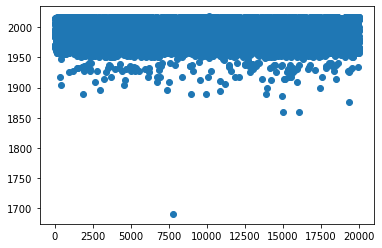

In [51]:
plt.scatter(x=np.arange(len(df_raw)), y=df_mod['build_year'])

Пусть выброс уж останется...

In [120]:
df_fill = df_mod.drop(columns=['id','timestamp'])

In [121]:
df_fill

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
0,1,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,...,36,7,2,15,33,1,12,75,10,15318960
1,64,64.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,...,2,2,0,0,13,1,0,6,1,6080000
2,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,Investment,...,13,6,1,8,18,0,1,52,0,17000000
3,71,49.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,0,0,0,1,3,0,2,8,2,990000
4,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,Investment,...,3,1,0,5,8,0,1,34,5,7900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,Investment,...,9,0,0,6,29,0,1,46,10,7200000
19996,38,NaN,4.0,17.0,1.0,NaN,2.0,1.0,1.0,OwnerOccupier,...,2,2,0,1,12,1,0,8,0,3971520
19997,35,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,Investment,...,13,3,0,6,27,1,10,57,13,7200000
19998,51,30.0,8.0,17.0,1.0,2011.0,2.0,9.0,NaN,Investment,...,1,0,0,0,7,0,0,3,0,3300000


Возьмем все-таки медиану, чтобы выбросы в других фичах не влияли

In [122]:
df_fill[num_columns] = SimpleImputer(strategy="median").fit_transform(df_fill[num_columns])
df_fill[cat_columns] = SimpleImputer(strategy="most_frequent").fit_transform(df_fill[cat_columns])

In [123]:
df_fill

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
0,1.0,1.0,1.0,1.0,1.0,1981.0,1.0,1.0,1.0,OwnerOccupier,...,36.0,7.0,2.0,15.0,33.0,1.0,12.0,75.0,10.0,15318960.0
1,64.0,64.0,16.0,12.0,1.0,1981.0,2.0,6.0,2.0,OwnerOccupier,...,2.0,2.0,0.0,0.0,13.0,1.0,0.0,6.0,1.0,6080000.0
2,83.0,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,Investment,...,13.0,6.0,1.0,8.0,18.0,0.0,1.0,52.0,0.0,17000000.0
3,71.0,49.0,2.0,12.0,1.0,1981.0,2.0,6.0,2.0,Investment,...,0.0,0.0,0.0,1.0,3.0,0.0,2.0,8.0,2.0,990000.0
4,60.0,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,Investment,...,3.0,1.0,0.0,5.0,8.0,0.0,1.0,34.0,5.0,7900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.0,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,Investment,...,9.0,0.0,0.0,6.0,29.0,0.0,1.0,46.0,10.0,7200000.0
19996,38.0,30.0,4.0,17.0,1.0,1981.0,2.0,1.0,1.0,OwnerOccupier,...,2.0,2.0,0.0,1.0,12.0,1.0,0.0,8.0,0.0,3971520.0
19997,35.0,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,Investment,...,13.0,3.0,0.0,6.0,27.0,1.0,10.0,57.0,13.0,7200000.0
19998,51.0,30.0,8.0,17.0,1.0,2011.0,2.0,9.0,2.0,Investment,...,1.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,3300000.0


In [124]:
df_onehot = pd.get_dummies(df_fill)

c:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [125]:
df_onehot

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,raion_popul,green_zone_part,...,ID_bus_terminal_10,ID_bus_terminal_11,ID_bus_terminal_12,ID_bus_terminal_13,ID_bus_terminal_14,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,1.0,1.0,1.0,1.0,1981.0,1.0,1.0,5.293465e+06,77878.0,0.023464,...,0,0,0,0,0,0,0,0,1,0
1,64.0,64.0,16.0,12.0,1981.0,2.0,6.0,6.677245e+07,9553.0,0.336177,...,0,0,0,0,0,0,0,1,0,0
2,83.0,44.0,9.0,17.0,1985.0,3.0,10.0,1.216448e+07,78507.0,0.297166,...,0,0,0,0,0,0,1,0,0,0
3,71.0,49.0,2.0,12.0,1981.0,2.0,6.0,4.708040e+06,38075.0,0.271702,...,0,0,0,0,0,0,0,1,0,0
4,60.0,42.0,9.0,9.0,1970.0,3.0,6.0,1.428699e+07,157010.0,0.389354,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.0,27.0,2.0,9.0,1978.0,2.0,5.0,2.481385e+07,174831.0,0.683844,...,0,0,0,0,0,0,1,0,0,0
19996,38.0,30.0,4.0,17.0,1981.0,2.0,1.0,6.677245e+07,9553.0,0.336177,...,0,0,0,0,0,0,0,1,0,0
19997,35.0,14.0,9.0,22.0,2001.0,1.0,10.0,1.004686e+07,76156.0,0.071056,...,0,0,0,0,0,1,0,0,0,0
19998,51.0,30.0,8.0,17.0,2011.0,2.0,9.0,4.036700e+07,21819.0,0.492840,...,0,0,0,0,0,0,0,1,0,0


Разделите имеющиеся у вас данные на обучающую и тестовую выборки. В качестве обучающей выборки возьмите первые 80% данных, последние 20% - тестовая выборка.

In [129]:
X = df_onehot.drop(columns=['price'])
y = df_onehot['price']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Возможно в ваших моделях вам придется указывать, какие колонки являются категориальными (например, в бустингах). Для упрощения предлагается разделить колонки по следующему принципу:
```
drop_columns = [
    'id',           # May leak information
    'timestamp',    # May leak information
]
cat_columns = [
    'product_type',              #
    'material',                  # Material of the wall
    'state',                     # Satisfaction level
    'sub_area',                  # District name
    'culture_objects_top_25',    #
    'thermal_power_plant_raion', #
    'incineration_raion',        #
    'oil_chemistry_raion',       #
    'radiation_raion',           #
    'railroad_terminal_raion',   #
    'big_market_raion',          #
    'nuclear_reactor_raion',     #
    'detention_facility_raion',  #
    'ID_metro',                  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',               #
    'ID_big_road1',              #
    'big_road1_1line',           #
    'ID_big_road2',              #
    'railroad_1line',            #
    'ID_railroad_terminal',      #
    'ID_bus_terminal',           #
    'ecology',                   #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))
```

### Baseline (2 балла)

В качестве Baseline обучите `DecisionTreeRegressor` из `sklearn`.

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
dtr = DecisionTreeRegressor(random_state=42)

In [135]:
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

Проверьте качество на отложенной выборке.

In [7]:
from sklearn.metrics import mean_squared_error

In [136]:
mean_squared_error(y_test, y_pred)**0.5

3810577.470936414

### Feature Engineering (2 балла)

Часто улучшить модель можно с помощью аккуратного Feature Engineering.

Добавим в модель дополнительные признаки:
* "Как часто в этот год и этот месяц появлились объявления"
* "Как часто в этот год и эту неделю появлялись объявления"

In [137]:
month_year = (df_raw.timestamp.dt.month + df_raw.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df_fill["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df_raw.timestamp.dt.weekofyear + df_raw.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df_fill["week_year_cnt"] = week_year.map(week_year_cnt_map)

C:\Users\danil\AppData\Local\Temp\ipykernel_12000\1165405586.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (df_raw.timestamp.dt.weekofyear + df_raw.timestamp.dt.year * 100)


Добавьте следюущие дополнительные признаки:
* Месяц (из колонки `timestamp`)
* День недели (из колонки `timestamp`)
* Отношение "этаж / максимальный этаж в здании" (колонки `floor` и `max_floor`)
* Отношение "площадь кухни / площадь квартиры" (колонки `kitchen_sq` и `full_sq`)

По желанию можно добавить и другие признаки.

*Добавим среднюю площадь комнаты*

In [138]:
df_fill["month"] = df_raw.timestamp.dt.month
df_fill["week_day"] = df_raw.timestamp.dt.weekday
df_fill["floor_to_max"] = np.minimum(1, df_fill['floor'] / df_fill['max_floor'])       #чтобы не появилсоь inf
df_fill["kitchen_to_full"] = np.minimum(1, df_fill['kitch_sq'] / df_fill['full_sq'])   #
df_fill["mean_room_sq"] = df_fill["full_sq"] / df_fill["num_room"]

In [145]:
df_fill.isna().sum()[df_fill.isna().sum() != 0]

floor_to_max       2
kitchen_to_full    1
dtype: int64

In [147]:
df_fill[df_fill.isna().any(axis=1)]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,sport_count_5000,market_count_5000,price,month_year_cnt,week_year_cnt,month,week_day,floor_to_max,kitchen_to_full,mean_room_sq
4007,0.0,77.0,4.0,17.0,1.0,1981.0,3.0,0.0,1.0,OwnerOccupier,...,10.0,0.0,8167508.0,834,125,11,2,0.235294,NaN,0.0
8974,74.0,74.0,0.0,0.0,1.0,2015.0,2.0,0.0,1.0,OwnerOccupier,...,6.0,1.0,5802830.0,547,91,8,4,NaN,0.0,37.0
18527,58.0,0.0,0.0,0.0,6.0,1981.0,1.0,0.0,1.0,OwnerOccupier,...,2.0,0.0,6867981.0,752,189,2,1,NaN,0.0,58.0


*Ну просто дропнем, почему тут 0 этажей и нулевая площадь...*

In [148]:
df_fill.dropna(inplace=True)
df_fill.isna().sum()[df_fill.isna().sum() != 0]

Series([], dtype: int64)

In [150]:
sorted(df_fill.mean_room_sq, reverse=True)[:10]

[inf, inf, inf, inf, inf, inf, inf, inf, 2663.0, 318.5]

*Тоже медианим*

In [151]:
df_fill["mean_room_sq"].replace(np.inf, np.median(df_fill.mean_room_sq), inplace=True)

In [152]:
sorted(df_fill.mean_room_sq, reverse=True)[:10]

[2663.0, 318.5, 317.0, 317.0, 301.5, 206.0, 197.0, 194.0, 176.5, 174.0]

Разделите выборку на обучающую и тестовую еще раз (потому что дополнительные признаки созданы для исходной выборки).

*Я не установил заранее пакеты, поэтому надо сохранить датасет, чтобы заново не обрабатывать...*

In [153]:
df_fill.to_csv('data_fill.csv')

In [154]:
# df = pd.read_csv('data_fill.csv', index_col='Unnamed: 0')

In [143]:
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,sport_count_5000,market_count_5000,price,month_year_cnt,week_year_cnt,month,week_day,floor_to_max,kitchen_to_full,mean_room_sq
0,1.0,1.0,1.0,1.0,1.0,1981.0,1.0,1.0,1.0,OwnerOccupier,...,75.0,10.0,15318960.0,1122,112,12,4,1.000000,1.000000,1.000000
1,64.0,64.0,16.0,12.0,1.0,1981.0,2.0,6.0,2.0,OwnerOccupier,...,6.0,1.0,6080000.0,327,68,10,3,1.000000,0.093750,32.000000
2,83.0,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,3.0,Investment,...,52.0,0.0,17000000.0,752,192,2,2,0.529412,0.120482,27.666667
3,71.0,49.0,2.0,12.0,1.0,1981.0,2.0,6.0,2.0,Investment,...,8.0,2.0,990000.0,262,69,7,3,0.166667,0.084507,35.500000
4,60.0,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,2.0,Investment,...,34.0,5.0,7900000.0,711,214,10,2,1.000000,0.100000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.0,27.0,2.0,9.0,1.0,1978.0,2.0,5.0,2.0,Investment,...,46.0,10.0,7200000.0,734,181,9,0,0.222222,0.111111,22.500000
19996,38.0,30.0,4.0,17.0,1.0,1981.0,2.0,1.0,1.0,OwnerOccupier,...,8.0,0.0,3971520.0,579,153,12,4,0.235294,0.026316,19.000000
19997,35.0,14.0,9.0,22.0,1.0,2001.0,1.0,10.0,2.0,Investment,...,57.0,13.0,7200000.0,861,277,6,3,0.409091,0.285714,35.000000
19998,51.0,30.0,8.0,17.0,1.0,2011.0,2.0,9.0,2.0,Investment,...,3.0,0.0,3300000.0,573,164,1,1,0.470588,0.176471,25.500000


In [158]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

### Model Selection (3 балла)

Посмотрите, какого качества можно добиться если использовать разные модели:
* `DecisionTreeRegressor` из `sklearn`
* `RandomForestRegressor` из `sklearn`
* `CatBoostRegressor`

Также вы можете попробовать линейные модели, другие бустинги (`LigthGBM` и `XGBoost`).

Почти все библиотеки поддерживают удобный способ подбора гиперпараметров: посмотрите как это делать в [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или в [catboost](https://catboost.ai/docs/concepts/python-reference_catboostregressor_grid_search.html).

Проверяйте качество каждой модели на тестовой выборке и выберите наилучшую.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


#### Решающее дерево

In [159]:
df_oh = pd.get_dummies(df)
X = df_oh.drop(columns=['price'])
y = df_oh['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [160]:
dtc = DecisionTreeRegressor(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [161]:
mean_squared_error(y_test, y_pred, squared=False)

3634514.602773389

Стало лучше, чем до инжиниринга

In [162]:
dtc = DecisionTreeRegressor()
parameters = {'max_depth':[2, 10, 50, 100, 200], 'min_samples_leaf':[1, 5, 10, 100, 1000]}
gs_tree = GridSearchCV(dtc,
                      param_grid=parameters,
                      scoring='neg_root_mean_squared_error',
                      cv=5)
gs_tree.fit(X_train, y_train)
gs_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 100}

In [172]:
dtc_best = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100, random_state=42)
dtc_best.fit(X_train, y_train)
y_pred = dtc_best.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

3050451.133584189

Прям сильно лучше стало...

#### Случайный лес

In [87]:
from multiprocessing import cpu_count
cpu_count()

4

In [173]:
rfr = RandomForestRegressor(n_jobs=3, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [174]:
mean_squared_error(y_test, y_pred, squared=False)

2722874.9277993306

RMSE гораздо меньше, чем у обычного дерева

In [96]:
rfr = RandomForestRegressor(random_state=42, n_jobs=3)
parameters = {'n_estimators': [100, 150], 'max_depth': [5, 10, 15]}
gs_forest = GridSearchCV(rfr,
                      param_grid=parameters,
                      scoring='neg_root_mean_squared_error',
                      cv=4)
gs_forest.fit(X_train, y_train)
gs_forest.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [175]:
rfr_best = RandomForestRegressor(n_estimators=150, max_depth=15)
rfr_best.fit(X_train, y_train)
y_pred = rfr_best.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2704849.628415663

In [234]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

Как оказалось, некоторые категориальные признаки нужно привести к строкам для использования в сatboost

In [235]:
cat_num = X[cat_columns].select_dtypes(include=['float64', 'int64']).columns

In [260]:
X[cat_num].applymap(int)

,material,state,ID_metro,ID_railroad_station_walk,ID_railroad_station_avto,ID_big_road1,ID_big_road2,ID_railroad_terminal,ID_bus_terminal
0,1,1,18,2,42,2,4,32,2
1,1,2,132,47,105,38,1,32,8
2,1,3,92,10,22,29,1,50,1
3,1,2,12,28,28,14,49,83,1
4,1,2,20,18,136,1,12,97,7
...,...,...,...,...,...,...,...,...,...
19995,1,2,79,42,73,1,43,32,8
19996,1,1,45,47,105,38,1,32,8
19997,1,2,71,29,27,2,4,32,2
19998,1,2,206,24,19,13,38,50,8


In [265]:
X[cat_num] = X[cat_num].applymap(int)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [241]:
catb = CatBoostRegressor(loss_function='RMSE', random_state=42, logging_level='Silent', cat_features=cat_columns)
catb.fit(X_train, y_train)
catb_pred = catb.predict(X_test)
mean_squared_error(y_test, catb_pred, squared=False)

2558192.6262269095

Ну еще получше стало

Вот так можно сделать гридсерч, но давайте уж без него...

In [ ]:
# boost = CatBoostRegressor(loss_function='RMSE', random_state=42, logging_level='Silent')
# parameters = {'iterations': [10, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'depth': [3, 5, 10]}
# result = boost.grid_search(parameters, X=X_train, y=y_train, verbose=False)

In [ ]:
# result['params']

In [242]:
df_enc = pd.get_dummies(df)
X = df_enc.drop(columns=['price'])
y = df_enc['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [243]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)
mean_squared_error(y_test, xgbr_pred, squared=False)

2690821.811801162

In [244]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train, eval_metric=mean_squared_error)
lgbmr_pred = lgbmr.predict(X_test)
mean_squared_error(y_test, lgbmr_pred, squared=False)

2597293.0362525214

Чуть хуже, чем у catboost

### Ensemble v.1 (3 балла)

Ансамбли иногда оказываются лучше чем одна большая модель.

В колонке `product_type` содержится информация о том, каким является объявление: `Investment` (продажа квартиры как инвестиции) или `OwnerOccupier` (продажа квартиры для жилья). Логично предположить, что если сделать по модели на каждый из этих типов, то качество будет выше.

Обучите свои лучшие модели на отдельно на `Investment` и `OwnerOccupier` (т.е. у вас будет `model_invest`, обученная на `(invest_train_X, invest_train_Y)` и `model_owner`, обученная на `(owner_train_X, owner_train_Y)`) и проверьте качество на отложенной выборке (т.е. на исходном `test_split`).

In [272]:
df_inv = df[df['product_type'] == 'Investment']
df_inv[cat_num] = df_inv[cat_num].applymap(int)

C:\Users\danil\AppData\Local\Temp\ipykernel_12000\1208555707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inv[cat_num] = df_inv[cat_num].applymap(int)


In [275]:
df_own = df[df['product_type'] == 'OwnerOccupier']
df_own[cat_num] = df_own[cat_num].applymap(int)

C:\Users\danil\AppData\Local\Temp\ipykernel_12000\3333183844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_own[cat_num] = df_own[cat_num].applymap(int)


In [276]:
X_inv = df_inv.drop(columns=['price'])
y_inv = df_inv['price']
X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(X_inv, y_inv, test_size=0.2,  random_state=42)

X_own = df_own.drop(columns=['price'])
y_own = df_own['price']
X_train_own, X_test_own, y_train_own, y_test_own = train_test_split(X_own, y_own, test_size=0.2,  random_state=42)

In [279]:
catb_inv = CatBoostRegressor(loss_function='RMSE', random_state=42, logging_level='Silent', cat_features=cat_columns)
catb_inv.fit(X_train_inv, y_train_inv)
catb_pred_inv = catb_inv.predict(X_test_inv)
mean_squared_error(y_test_inv, catb_pred_inv, squared=False)

2984447.011466033

In [278]:
catb_own = CatBoostRegressor(loss_function='RMSE', random_state=42, logging_level='Silent', cat_features=cat_columns)
catb_own.fit(X_train_own, y_train_own)
catb_pred_own = catb_own.predict(X_test_own)
mean_squared_error(y_test_own, catb_pred_own, squared=False)

1435312.767772965

In [294]:
(mean_squared_error(y_test_inv, catb_pred_inv, squared=False) + mean_squared_error(y_test_own, catb_pred_own, squared=False)) / 2

2209879.889619499

In [300]:
df_inv_enc = pd.get_dummies(df_inv)
df_own_enc = pd.get_dummies(df_own)
X_inv_enc = df_inv_enc.drop(columns=['price'])
y_inv_enc = df_inv_enc['price']
X_own_enc = df_own_enc.drop(columns=['price'])
y_own_enc = df_own_enc['price']

X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(X_inv_enc, y_inv_enc, test_size=0.2,  random_state=42)
X_train_own, X_test_own, y_train_own, y_test_own = train_test_split(X_own_enc, y_own_enc, test_size=0.2,  random_state=42)

In [281]:
lgbmr_inv = LGBMRegressor()
lgbmr_inv.fit(X_train_inv, y_train_inv, eval_metric=mean_squared_error)
lgbmr_pred_inv = lgbmr_inv.predict(X_test_inv)
mean_squared_error(y_test_inv, lgbmr_pred_inv, squared=False)

3043668.7899083947

In [282]:
lgbmr_own = LGBMRegressor()
lgbmr_own.fit(X_train_own, y_train_own, eval_metric=mean_squared_error)
lgbmr_pred_own = lgbmr_own.predict(X_test_own)
mean_squared_error(y_test_own, lgbmr_pred_own, squared=False)

1653710.5115896543

In [295]:
(mean_squared_error(y_test_inv, lgbmr_pred_inv, squared=False) + mean_squared_error(y_test_own, lgbmr_pred_own, squared=False)) / 2

2348689.6507490245

На Investment ошибка сильно уменьшилась, а на OwnerOccupier возросла, но общая ошибка уменьшилась

### (*) Ensemble v.2 (дополнительно, 2 балла)

Попробуйте сделать для `Investment` более сложную модель: обучите `CatBoostRegressor` и `HuberRegressor` из `sklearn`, а затем сложите их предсказания с весами `w_1` и `w_2` (выберите веса сами; сумма весов равняется 1).

In [296]:
from sklearn.linear_model import HuberRegressor

In [301]:
# catb_v2 = CatBoostRegressor(loss_function='RMSE', random_state=42, logging_level='Silent', cat_features=cat_columns)
# catb_v2.fit(X_train_inv, y_train_inv)
# catb_pred_inv = catb_v2.predict(X_test_inv)
hub_reg = HuberRegressor(max_iter=1000)
hub_reg.fit(X_train_inv, y_train_inv)
hub_reg_inv = hub_reg.predict(X_test_inv)

c:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [304]:
mean_squared_error(y_test_inv, hub_reg_inv, squared=False)

4792458.268815419

In [311]:
weights = np.arange(0, 1.1, 0.1)
weights
for w in weights:
    ensemble_inv = w * hub_reg_inv + (1 - w) * catb_pred_inv
    print(f'RMSE of ensemble HuberRegressor (weight = {w.round(1)}) and CatBoost (weight = {(1 - w).round(1)}): {mean_squared_error(y_test_inv, ensemble_inv, squared=False)}')

RMSE of ensemble HuberRegressor (weight = 0.0) and CatBoost (weight = 1.0): 2984447.011466033
RMSE of ensemble HuberRegressor (weight = 0.1) and CatBoost (weight = 0.9): 3003616.7257021256
RMSE of ensemble HuberRegressor (weight = 0.2) and CatBoost (weight = 0.8): 3069764.624848819
RMSE of ensemble HuberRegressor (weight = 0.3) and CatBoost (weight = 0.7): 3179960.410982423
RMSE of ensemble HuberRegressor (weight = 0.4) and CatBoost (weight = 0.6): 3329833.8585047186
RMSE of ensemble HuberRegressor (weight = 0.5) and CatBoost (weight = 0.5): 3514312.2771688886
RMSE of ensemble HuberRegressor (weight = 0.6) and CatBoost (weight = 0.4): 3728262.327688621
RMSE of ensemble HuberRegressor (weight = 0.7) and CatBoost (weight = 0.3): 3966918.3421203666
RMSE of ensemble HuberRegressor (weight = 0.8) and CatBoost (weight = 0.2): 4226096.807744288
RMSE of ensemble HuberRegressor (weight = 0.9) and CatBoost (weight = 0.1): 4502254.909507962
RMSE of ensemble HuberRegressor (weight = 1.0) and CatBo

HuberRegressor не помогает ситуации, очевидно что CatBoost лучше решает задачу